# Data Pipelines with TensorFlow

**Objectives**
- How to make pipelines with Deep Learning
- How to load heavy data batch per batch

# Part I: How to make pipelines with Deep Learning

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

/Users/Hindi/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Load data

Let's load the **PetFinder** dataset. Each row describes a pet, and each column describes an attribute.  
You will use this information to **predict if the pet will be adopted**. 

<details>
    <summary>Below is a description of this dataset.
</summary>

Column | Description| Feature Type | Data Type
------------|--------------------|----------------------|-----------------
Type | Type of animal (Dog, Cat) | Categorical | string
Age |  Age of the pet | Numerical | integer
Breed1 | Primary breed of the pet | Categorical | string
Color1 | Color 1 of pet | Categorical | string
Color2 | Color 2 of pet | Categorical | string
MaturitySize | Size at maturity | Categorical | string
FurLength | Fur length | Categorical | string
Vaccinated | Pet has been vaccinated | Categorical | string
Sterilized | Pet has been sterilized | Categorical | string
Health | Health Condition | Categorical | string
Fee | Adoption Fee | Numerical | integer
Description | Profile write-up for this pet | Text | string
PhotoAmt | Total uploaded photos for this pet | Numerical | integer
AdoptionSpeed | Speed of adoption | Classification | integer
</details>

In [2]:
dataframe = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/petfinder.csv")
dataframe.head()

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,target
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,1,1
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,2,1
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,7,1
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,8,1
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,3,1


In [3]:
#Prepare your train, validation and test values

from sklearn.model_selection import train_test_split

X= dataframe.drop(columns=["target"])
y = dataframe["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.33)

In [4]:
#check your dat types
dataframe.dtypes

Type            object
Age              int64
Breed1          object
Gender          object
Color1          object
Color2          object
MaturitySize    object
FurLength       object
Vaccinated      object
Sterilized      object
Health          object
Fee              int64
PhotoAmt         int64
target           int64
dtype: object

☝️ Our dataset comprises of both Numerical and Categorical values. We need to preprocess them before feeding into a Neural Network.

You have three options:

**A**. Use sklean to preprocess data before feeding a neural network (no pipelines)  
**B**. Wrap your neural network into a sklearn estimator (pipelines)  
**C**. Use full Tensorflow pipelines  

## A. Use sklean to preprocess data before feeding a neural network (no pipelines)

#### Preprocessing
❓ Create a `X_train_preproc`, `X_val_preproc`, `X_test_preproc` scaling numerical data and One Hot Encoding categorical one

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

In [9]:
prepoc_pipe = ColumnTransformer([("num_prepoc",StandardScaler(),make_column_selector(dtype_include=["int64"])),
("cat_prepoc",OneHotEncoder(sparse= False, handle_unknown="ignore"),make_column_selector(dtype_include=["object"]))    
])

In [11]:
X_train_preproc=prepoc_pipe.fit_transform(X_train)
X_train_preproc

array([[ 0.16384493, -0.29845584, -0.82680539, ...,  1.        ,
         0.        ,  0.        ],
       [-0.34289801, -0.29845584, -0.19466094, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.06249634, -0.29845584,  0.75355574, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.34289801, -0.29845584, -0.19466094, ...,  1.        ,
         0.        ,  0.        ],
       [-0.39357231, -0.29845584, -0.82680539, ...,  1.        ,
         0.        ,  0.        ],
       [-0.24154942, -0.29845584, -0.19466094, ...,  1.        ,
         0.        ,  0.        ]])

In [12]:
X_val_preproc=prepoc_pipe.transform(X_val)

In [13]:
X_test_preproc=prepoc_pipe.transform(X_test)

#### Neural Network

❓ Fit a Neural Network and evaluate its performance on the test set 

In [14]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping


In [28]:
#Design a model with:
#...a layer with 32 neurons
#...a layer with 15 neurons
#...with Dropout Layers

model = Sequential()
model.add(layers.Dense(32,activation = "relu"))
model.add(layers.Dense(15,activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")


In [29]:
es= EarlyStopping(patience=2, restore_best_weights=True)



model.fit(X_train_preproc,y_train, validation_data=(X_val_preproc,y_val), batch_size=32, epochs=1000,
            callbacks=[es])

Epoch 1/1000
162/162 [==============================] - 2s 14ms/step - loss: 0.6120 - accuracy: 0.6817 - val_loss: 0.5392 - val_accuracy: 0.7468
Epoch 2/1000
162/162 [==============================] - 2s 14ms/step - loss: 0.5541 - accuracy: 0.7289 - val_loss: 0.5234 - val_accuracy: 0.7475
Epoch 3/1000
162/162 [==============================] - 3s 16ms/step - loss: 0.5420 - accuracy: 0.7356 - val_loss: 0.5151 - val_accuracy: 0.7566ss: 0.546
Epoch 4/1000
162/162 [==============================] - 2s 11ms/step - loss: 0.5290 - accuracy: 0.7404 - val_loss: 0.5053 - val_accuracy: 0.7542
Epoch 5/1000
162/162 [==============================] - 2s 10ms/step - loss: 0.5215 - accuracy: 0.7470 - val_loss: 0.5006 - val_accuracy: 0.7546
Epoch 6/1000
162/162 [==============================] - 1s 9ms/step - loss: 0.5171 - accuracy: 0.7509 - val_loss: 0.4944 - val_accuracy: 0.7562
Epoch 7/1000
162/162 [==============================] - 2s 11ms/step - loss: 0.5104 - accuracy: 0.7532 - val_loss: 0.4917 

In [19]:
res= model.evaluate(X_test_preproc, y_test)
res

119/119 [==============================] - 2s 13ms/step - loss: 0.5189 - accuracy: 0.7474 0s - l


[0.5189257264137268, 0.7473739385604858]

## B. Wrap your neural network into a sklearn estimator & pipelines

We can actually treat a Keras model as a scikit-learn estimator, using [Keras Wrappers](https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn)  
It allows us to place the estimator inside a sklearn pipeline and include preprocessing inside. We can even gridsearch hyper-params.

❓Run the cells below to undersand the syntax

In [30]:
def create_model():
    
    # Define architecture without input dim yet, as we don't know the shape post preprocessing
    model = Sequential()
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [41]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn = create_model, 
                        epochs=10, 
                        batch_size=32, 
                        verbose=1)

❓ Evaluate - or rather cross-validate - your estimator on your training set already preprocessed

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
re = cross_val_score(model,X_train_preproc, y_train, cv=2, n_jobs=-1)

In [34]:
re

array([0.75511783, 0.72769409])

❓ Wrap your model inside a pipeline including preprocessing and evaluate it directly on the raw data this time(use cross validate)

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
final_pipe = Pipeline([("prep",prepoc_pipe),("modelNN",model)])
final_pipe.fit(X_train,y_train)

Epoch 1/10
162/162 [==============================] - 2s 10ms/step - loss: 0.5884 - accuracy: 0.7057
Epoch 2/10
162/162 [==============================] - 1s 6ms/step - loss: 0.5569 - accuracy: 0.7292: 0s -
Epoch 3/10
162/162 [==============================] - 1s 7ms/step - loss: 0.5468 - accuracy: 0.7308
Epoch 4/10
162/162 [==============================] - 1s 8ms/step - loss: 0.5406 - accuracy: 0.7348
Epoch 5/10
162/162 [==============================] - 1s 9ms/step - loss: 0.5369 - accuracy: 0.7362
Epoch 6/10
162/162 [==============================] - 1s 7ms/step - loss: 0.5260 - accuracy: 0.7443
Epoch 7/10
162/162 [==============================] - 2s 9ms/step - loss: 0.5236 - accuracy: 0.7408
Epoch 8/10
162/162 [==============================] - 2s 11ms/step - loss: 0.5166 - accuracy: 0.7460
Epoch 9/10
162/162 [==============================] - 2s 10ms/step - loss: 0.5137 - accuracy: 0.7511
Epoch 10/10
162/162 [==============================] - 2s 11ms/step - loss: 0.5124 - accura

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num_prepoc',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x143cdf9d0>),
                                                 ('cat_prepoc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x143cdf650>)])),
                ('modelNN',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x144df7f90>)])

#### GridSearch CV on the pipeline!

Now that our model is pipelined, we can even grid_searched its hyper-parameters

❓ Run the cells below to understand how the syntax works

In [44]:
def create_model_grid(activation = 'relu', 
                      optimizer ='adam'):
    # create model
    model = Sequential()
    model.add(layers.Dense(32, activation=activation))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(15, activation=activation))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

In [45]:
model_grid = KerasClassifier(
    build_fn=create_model_grid,
    epochs=10,
    batch_size=32,
    verbose=1
)

In [46]:
#Prepare a pipeline
final_pipe_grid = Pipeline([("prep",prepoc_pipe),("modelNNgrid",model_grid)])

In [47]:
#check the parameters you can tune
final_pipe_grid.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('num_prepoc', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x143cdf9d0>),
                                   ('cat_prepoc',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x143cdf650>)])),
  ('modelNNgrid',
   <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier at 0x145037bd0>)],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('num_prepoc', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x143cdf9d0>),
                                 ('cat_prepoc',
                                  OneHotEncoder(handle_unknown='ignore',
                              

In [48]:
# Now, we can gridsearch the hyper-params of everything
# From the preprocessing, the architecture, the compiler, and the fit!

#Gridsearch for
#activiation (tanh,relu)
#optimizer(adam or rmsprop)
#batch_size (8 or 64)

from sklearn.model_selection import GridSearchCV

params= {"modelNNgrid__batch_size":[8,32],
         "modelNNgrid__activation":["relu","tanh"],
         "modelNNgrid__optimizer":["adam","rmsprop"]  
}

regrid = GridSearchCV(final_pipe_grid, params, n_jobs=-1, cv=2)
regrid.fit(X_train,y_train)

Epoch 1/10
162/162 [==============================] - 1s 9ms/step - loss: 0.5889 - accuracy: 0.7117
Epoch 2/10
162/162 [==============================] - 1s 5ms/step - loss: 0.5635 - accuracy: 0.7242
Epoch 3/10
162/162 [==============================] - 1s 6ms/step - loss: 0.5560 - accuracy: 0.7339
Epoch 4/10
162/162 [==============================] - 1s 8ms/step - loss: 0.5504 - accuracy: 0.7377: 0s - loss: 0.553
Epoch 5/10
162/162 [==============================] - 1s 7ms/step - loss: 0.5452 - accuracy: 0.7397
Epoch 6/10
162/162 [==============================] - 1s 8ms/step - loss: 0.5481 - accuracy: 0.7366
Epoch 7/10
162/162 [==============================] - 1s 7ms/step - loss: 0.5401 - accuracy: 0.7406
Epoch 8/10
162/162 [==============================] - 1s 7ms/step - loss: 0.5398 - accuracy: 0.7364
Epoch 9/10
162/162 [==============================] - 1s 7ms/step - loss: 0.5366 - accuracy: 0.7453
Epoch 10/10
162/162 [==============================] - ETA: 0s - loss: 0.5336 - ac

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num_prepoc',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x143cdf9d0>),
                                                                        ('cat_prepoc',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x143cdf650>)])),
                                       ('modelNNgrid',
                                        <tensorflow.python.keras.wrappers.scikit_lea

In [49]:
#Display the best params and score
regrid.best_params_

{'modelNNgrid__activation': 'tanh',
 'modelNNgrid__batch_size': 32,
 'modelNNgrid__optimizer': 'rmsprop'}

In [ ]:
regrid.best_score_

In [ ]:
#cross validate your score
best_model = regrid.best_estimator_

cross_val_score(best_model,X_train,y_train)

## Option C: Full pipeline in Tensorflow

This option is recommended for real projects, especially when you need (i) performance or (ii) production-readiness


<details>
    <summary>Why?</summary>

Indeed, having all preprocessing inside one single TensorFlow Keras model allows to generate one [`tf.Graph`](https://www.tensorflow.org/guide/intro_to_graphs) representation of your model, which is mandatory for distributed computation and serving on many devices (using Tensorflow Lite for back-end-free predictions for instance). 
</details>

The idea is to use **Normalization** and **CategoryEncoding** layers within your model architecture.

### 😌 If the preproc pipeline is sequential, everything is easy

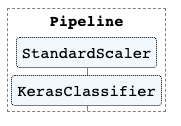

For instance, if there were only numerical data on our dataset:

In [ ]:
# Imagine we only have numerical data to scale
X_train_num = X_train.select_dtypes(include=['int64']).values
X_val_num = X_val.select_dtypes(include=['int64']).values
X_test_num = X_test.select_dtypes(include=['int64']).values

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization

########NEW_CONCEPT########
normalizer = Normalization() # Instantiate a "normalizer" layer
normalizer.adapt(X_train_num) # "Fit" it on the train set
###########################

In [ ]:
model = Sequential()

########NEW LAYER########
model.add(normalizer) # Use it as first sequential step
########################

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_train_num,
          y_train,
          validation_data=(X_val_num, y_val),
          batch_size=64,
          epochs=20, verbose=0)

model.evaluate(X_test_num, y_test)

### 🤯 if the preproc pipeline requires parallel column transformers, TF Sequential API `model.add(...)` is not enough 

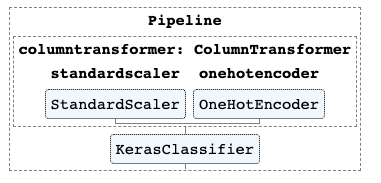

☝️ You will need to use TF **Fonctional API** to produce a non-sequential Neural Network

Don't worry: you **will** be able to learn how to build such models if you want.

📚 [Google's Tutorial](https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers) show you how to solve this exact PetFinder dataset with this method

Non-sequential models look something like:

```python
# Numerical preprocessing model = function(X_numerical)
model_numerical = ...  

# Categorical preprocessing model = function(X_categorical)
model_categorical = ...

# Combined model
all_features = layers.concatenate([model_numerical, model_categorical])

# Then create the Dense network on the preprocessed features
x = tf.keras.layers.Dense(8, activation="relu")(all_features)
x = tf.keras.layers.Dense(2, activation="relu")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(all_inputs, output)

model.compile(...)
```

<img src='https://github.com/lewagon/data-images/blob/master/DL/non_sequential_models.png?raw=true' width=400>

# Part II. How to deal with heavy datasets?

⚠️ Most Deep Learning project uses data **too heavy to be loaded on RAM entirely**  
  Fortunately, we only have to train our network **batch per batch**!

✅ Tensorflow provides a powerful [`tf.data.Dataset`]() class that help to deal with it data loading and processing batch-per-batch

✅ Keras provides cool [`tf.keras.preprocessing`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing) wrappers around this to avoid getting your hand too dirty:
- `image_dataset_from_directory`
- `text_dataset_from_directory`
- `timeseries_dataset_from_array`

Let's illustrate this with a heavy images datasets

### 1. Save large files on a hard drive (local or cloud)

❓ Run following cells (never mind the syntax)

In [ ]:
! pip install -U --quiet tensorflow_datasets Pillow

In [50]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt

In [51]:
# We download 229Mo of images

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

#returns path to the donwloaded file
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', #folder_name
                                   untar=True) #decompress yourfile
print(data_dir)
#allows me to call functions on my path
data_dir = pathlib.Path(data_dir)
data_dir

/Users/Hindi/.keras/datasets/flower_photos


PosixPath('/Users/Hindi/.keras/datasets/flower_photos')

In [52]:
#show data_dir type
type(data_dir)

pathlib.PosixPath

In [53]:
# We just unzipped and saved all these file in the following folder 
data_dir

PosixPath('/Users/Hindi/.keras/datasets/flower_photos')

In [54]:
# Notice how each photo is saved in a different folder depending on its category
! ls $data_dir

LICENSE.txt daisy       dandelion   roses       sunflowers  tulips


In [55]:
# In total we have 229Mo of files, compressed.
# Imagine they were 50Go ? They couldn't fit in RAM
#du command: gain disk usage information 
! du -h $data_dir

 39M	/Users/Hindi/.keras/datasets/flower_photos/roses
 54M	/Users/Hindi/.keras/datasets/flower_photos/sunflowers
 34M	/Users/Hindi/.keras/datasets/flower_photos/daisy
 48M	/Users/Hindi/.keras/datasets/flower_photos/dandelion
 54M	/Users/Hindi/.keras/datasets/flower_photos/tulips
229M	/Users/Hindi/.keras/datasets/flower_photos


In [57]:
# We have 3670 jpg images in 5 classes
# data_dir.glob provides the url of different files
#*/ access all folders
#*.format access all files with the given format
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
#How many flowers there are in daisy folder?

In [58]:
# Path of all images 
sunflowers = list(data_dir.glob('sunflowers/*.jpg'))
sunflowers # list of path for all my flowers

[PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/6204049536_1ac4f09232_n.jpg'),
 PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/18828283553_e46504ae38.jpg'),
 PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/8021568040_f891223c44_n.jpg'),
 PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/4942258704_c4146b710a_n.jpg'),
 PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/5979668702_fdaec9e164_n.jpg'),
 PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/11881770944_22b4f2f8f6_n.jpg'),
 PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/8928614683_6c168edcfc.jpg'),
 PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/17148843706_df148301ac_n.jpg'),
 PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/14925398301_55a180f919_n.jpg'),
 PosixPath('/Users/Hindi/.keras/datasets/flower_photos/sunflowers/200557977_bf24d9550b.jpg'),
 PosixPath('/Users/Hindi/.keras/d

In [59]:
str(sunflowers[10])

'/Users/Hindi/.keras/datasets/flower_photos/sunflowers/14889392928_9742aed45b_m.jpg'

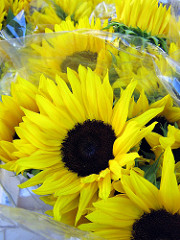

In [61]:
#str to convert PoxixPath object to a stringpath

#Function to open images in jupyter
PIL.Image.open(str(sunflowers[12]))

### 2. Prepare to load images in RAM memory batch per batch 

We will use `image_dataset_from_directory`

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [62]:
#Generates a `tf.data.Dataset` from image files in a directory

#you need to provide a path containing images already classified in sub-folders
ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  batch_size=32)

Found 3670 files belonging to 5 classes.


☝️ Notice how it automatically labels data into the 5 class!
- By default, `labels='inferred'` from the folder structure
- You can pass a list of labels manually with a list integer

In [63]:
# `ds` is a `tf.data.Dataset` object of "tuples"
ds

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [64]:
# Dataset contain no real data until they are iterated over 
import sys
#Return the size of object in bytes.
sys.getsizeof(ds)

64

In [65]:
for (X_batch, y_batch)  in ds:
    print(X_batch.shape)
    print(y_batch.shape)
    break # just show the first element

(32, 256, 256, 3)
(32,)


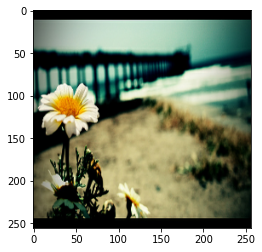

In [69]:
# check first image
plt.imshow(X_batch[10]/255)

`tf.data.Dataset` are just an abstraction that represents a sequence of elements. They allow to

- Load elements batch-per-batch in memory
- From different formats, storage places, etc...
- Apply preprocessing on the fly (ex: shuffle, resize, and many many more)

📚 [TF Guide on data](https://www.tensorflow.org/guide/data)

### Train a model directly on a `Dataset`

❓ Try to fit a very simple dense NN on `ds` 

- You can directly call `model.fit(ds, epochs=1)`
- Your first layer should use `layers.Flatten` to flatten a (256,256,3) picture in into a (256 * 256 * 3,) vector so acceptable for Dense layers
- You can use `loss='sparse_categorical_crossentropy'`: "sparse_" avoids one-hot-encoding the target with `to_categorical(y)`


In [70]:
X_batch.shape

TensorShape([32, 256, 256, 3])

In [71]:
y_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 4, 4, 2, 4, 4, 2, 0, 1, 1, 0, 2, 3, 1, 1, 2, 0, 3, 3, 2, 4, 3,
       2, 1, 2, 1, 1, 3, 2, 4, 3, 1], dtype=int32)>

In [72]:
# Let's try a dummy model, just to prove that it can fit
model = Sequential()

# flattens the picture first into (256*256*3,) vector so it can pass into a Dense layer
model.add(layers.Flatten(input_shape=(256,256,3))) 
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                3145744   
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 85        
Total params: 3,145,829
Trainable params: 3,145,829
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
  metrics=['accuracy'])

model.fit(ds, epochs=1)

💡 Accuracy is no better than random because such Dense model architecture is not fitted to the task

In next session, we will use **convolutional neural networks (CNN)**

### (bonus) Proper solution to the flower problem using CNN & early stopping

In [ ]:
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64, 64), # resize on the fly
    batch_size=32)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64), # resize on the fly
    batch_size=32)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1. / 255))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=[EarlyStopping(patience=0)]
)

🏁 **Congratulation** 🏁